# Random Forest Classifier

<span>The Random Forest Classifications algorithim use a ensemble of Decision Trees whent training its model. Each decision tree in the ensemble is trained on a random subset of the features. At the same time each decicision tree in the ensemble is meant to overfit the data in some manner. After each decisions tree is trained the ensemble averages the results between each all the trees to gets it's model.</span>

### Import Preliminaries

In [19]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
 
# Import modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd 
import seaborn
import warnings

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting options
mpl.rcParams['figure.figsize'] = (9.0, 3.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [20]:
# Import Breast Cancer data
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Conduct a train-test split on the data
train_x, test_x, train_y, test_y = train_test_split(X,y)

# View the training dataframe
pd.DataFrame(train_x, columns=breast_cancer['feature_names']).head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,8.878,15.490,56.740,241.000,0.083,0.077,0.047,0.024,0.193,0.066,0.538,1.200,4.277,30.180,0.011,0.029,0.032,0.015,0.028,0.004,9.981,17.700,65.270,302.000,0.102,0.125,0.094,0.048,0.243,0.074
1,16.020,23.240,102.700,797.800,0.082,0.067,0.033,0.033,0.153,0.057,0.380,1.187,2.466,40.510,0.004,0.009,0.011,0.008,0.015,0.003,19.190,33.880,123.800,1150.000,0.118,0.155,0.146,0.100,0.295,0.085
2,18.050,16.150,120.200,1006.000,0.106,0.215,0.168,0.108,0.215,0.067,0.981,0.550,6.311,134.800,0.008,0.058,0.047,0.021,0.026,0.007,22.390,18.910,150.100,1610.000,0.148,0.563,0.379,0.210,0.375,0.111
3,14.340,13.470,92.510,641.200,0.099,0.076,0.057,0.046,0.207,0.054,0.522,0.812,3.763,48.290,0.007,0.014,0.024,0.013,0.023,0.001,16.770,16.900,110.400,873.200,0.130,0.152,0.163,0.109,0.306,0.061
4,14.220,23.120,94.370,609.900,0.107,0.241,0.198,0.066,0.238,0.075,0.286,2.110,2.112,31.720,0.008,0.135,0.117,0.017,0.051,0.012,15.740,37.180,106.400,762.400,0.153,0.933,0.849,0.177,0.517,0.145


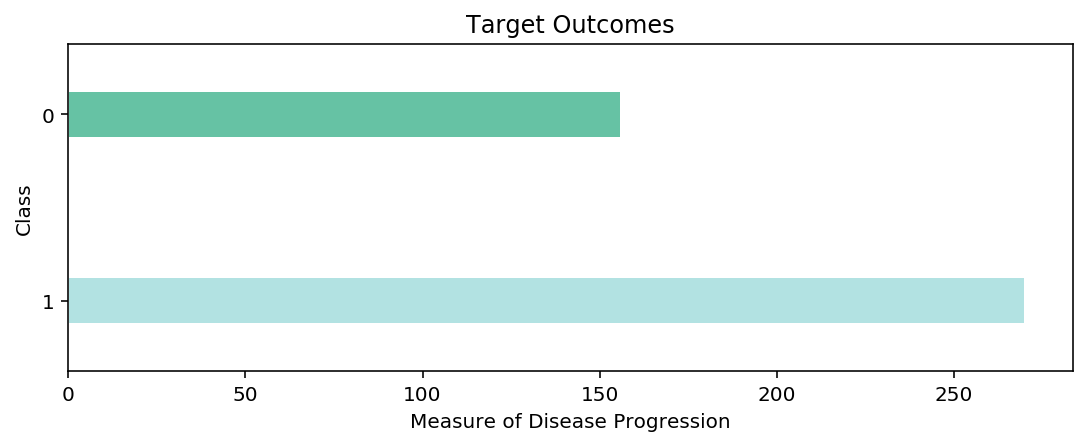

In [21]:
# Plot a barplot of the target clasees
pd.Series(train_y).value_counts().plot.barh(grid=False, color=['#B2E2E2','#66C2A4'], width=0.25,edgecolor='w')
plt.title('Target Outcomes')
plt.ylabel('Class')
plt.xlabel('Measure of Disease Progression');

### Fit the Model

In [22]:
# Fit the intial model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_x, train_y);

### Model Evaluation

##### Cross Validation Score

In [23]:
# View the cross validation score of the intial model
scores = cross_val_score(rf_model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.95764


##### Confustion Matrix

In [24]:
# Training Confusion Matrix
from sklearn.metrics import confusion_matrix
cmatrix = pd.DataFrame(confusion_matrix(train_y, rf_model.predict(train_x)))
cmatrix.index.name = 'class'

cmatrix['result'] = 'actual'
cmatrix.set_index('result', append=True, inplace=True)
cmatrix = cmatrix.reorder_levels(['result', 'class'])
cmatrix = cmatrix.stack()
cmatrix = pd.DataFrame(cmatrix)
cmatrix.columns = ['prediction']
cmatrix.unstack()

prediction     
                      0    1
result class                
actual 0            156    0
       1              0  270

##### Feature Importance

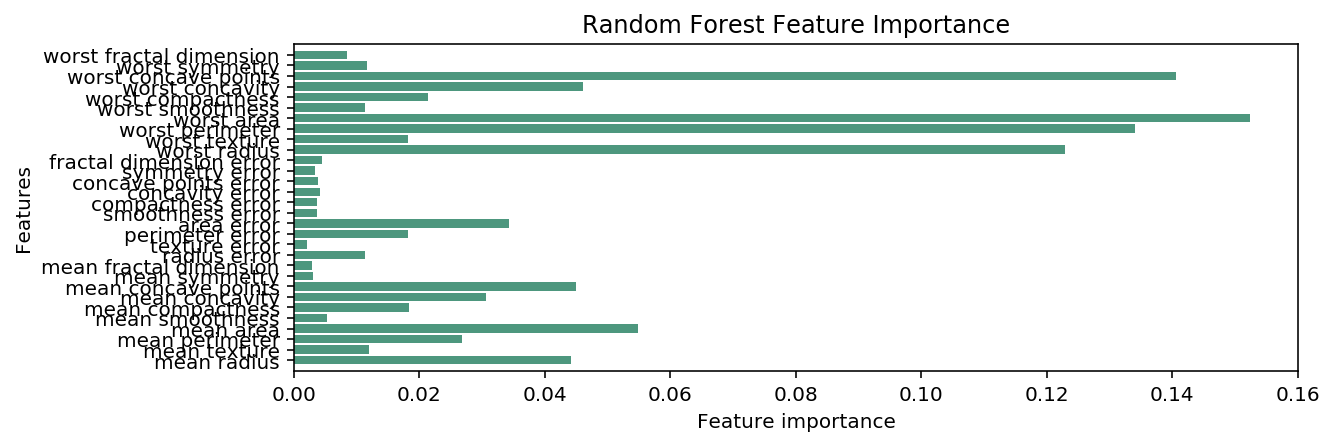

In [25]:
# Plot Tree's Feature Importance
n_features = breast_cancer.data.shape[1]
plt.barh(range(n_features), rf_model.feature_importances_, align='center', color='#4D977E')
plt.yticks(np.arange(n_features), breast_cancer.feature_names)
plt.title('Random Forest Feature Importance')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features);

##### Parameter Tuning

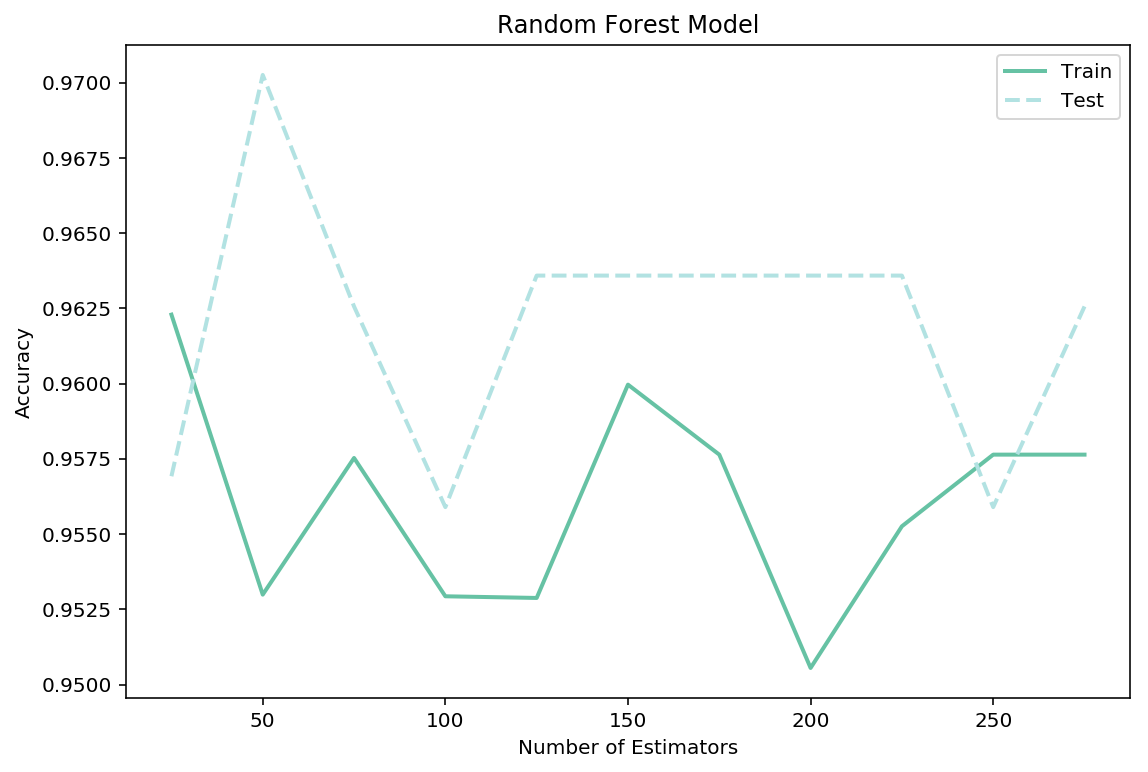

In [26]:
# Define paraameter range and score lists
n_estimators_range = np.arange(0,300, 25)[1:]
train_score = []
test_score = []

# Train a knn_model for every neighbour value in our list
for i in n_estimators_range:
    rf_model=RandomForestClassifier(n_estimators = i).fit(train_x,train_y)
    train_score.append(cross_val_score(rf_model, train_x, train_y, cv=10, scoring='accuracy').mean())
    test_score.append(cross_val_score(rf_model, test_x, test_y, cv=10, scoring='accuracy').mean())

# Plot our results
mpl.rcParams['figure.figsize'] = (9.0, 6.0)
plt.plot(n_estimators_range,train_score,label="Train",linewidth=2, color='#66C2A4') 
plt.plot(n_estimators_range,test_score,label="Test", linewidth=2,linestyle='--', color='#B2E2E2')
plt.legend()
plt.title('Random Forest Model')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy');

##### Grid Searching Turnning

In [27]:
train_x.shape

(426, 30)

In [ ]:
# Set up parameter grid
grid = {'n_estimators':np.arange(0,100, 25)[1:],
        'max_depth':list(range(2,30,4)),
        'max_features': list(range(1,30,5)),
        'max_leaf_nodes':[5,10,25,50,75,100]}

# Conduct gird search
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid, 
                     scoring='accuracy', n_jobs=-1, refit=True, cv=10,
                     return_train_score=True)
# Fit model
grid_search.fit(train_x,train_y);

In [ ]:
print('Accuracy of best parameters: %.5f'%grid_search.best_score_)
print('Best parameters: %s' %grid_search.best_params_)

### Final Model

In [ ]:
# Fit the final model
rf_model = rf_model = RandomForestClassifier()
rf_model.fitit(train_x, train_y)

# View the cross validation score of the intial model
scores = cross_val_score(dt_model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

##### Confustion Matrix

In [14]:
# Training Confusion Matrix
from sklearn.metrics import confusion_matrix
cmatrix = pd.DataFrame(confusion_matrix(train_y, rf_model.predict(train_x)))
cmatrix.index.name = 'class'

cmatrix['result'] = 'actual'
cmatrix.set_index('result', append=True, inplace=True)
cmatrix = cmatrix.reorder_levels(['result', 'class'])
cmatrix = cmatrix.stack()
cmatrix = pd.DataFrame(cmatrix)
cmatrix.columns = ['prediction']
cmatrix.unstack()

prediction     
                      0    1
result class                
actual 0            153    0
       1              0  273

##### Feature Importance

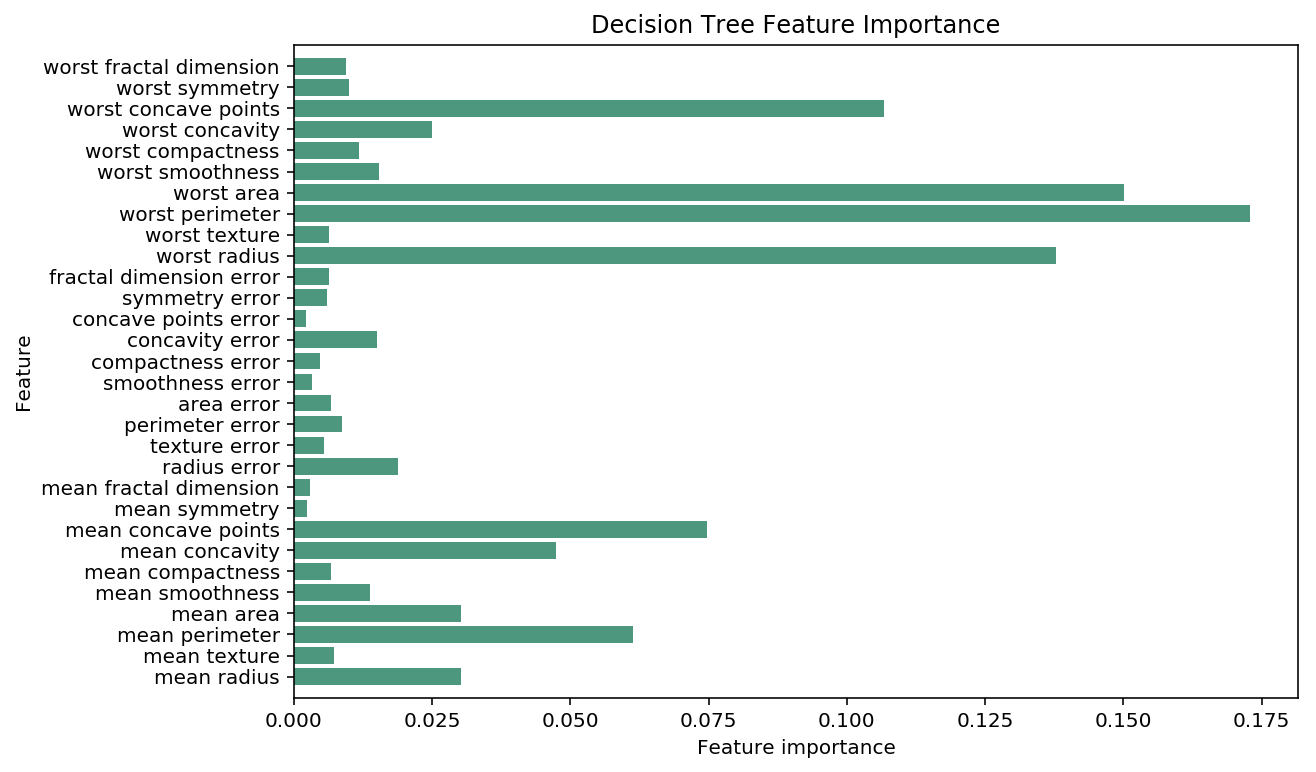

In [18]:
# Plot Ensembles's Feature Importance
n_features = breast_cancer.data.shape[1]
plt.barh(range(n_features), rf_model.feature_importances_, align='center', color='#4D977E')
plt.yticks(np.arange(n_features), breast_cancer.feature_names)
plt.title('Random Forest Feature Importance')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features);

### Predict Results

In [7]:
# Predict the results from our test data
pd.Series(model.predict(test_x)).head(n=7)

0    0
1    1
2    0
3    1
4    1
5    0
6    1
dtype: int64

### General Notes

- Feature importance is calculated by aggregating the results across decision trees
- Random Forests are decisions tree with all the upside and fewer downsides
- Build has many decision trees has you have time and memory for
- Adding max features and max leaf nodes to your decision trees might sometimes improve performance
- Require little to no preprocessing

Author: Kavi Sekhon